## 1. Project Setup & Requirements
- Install required libraries: pandas, numpy, matplotlib, plotly, scikit-learn


In [4]:

!pip install pandas matplotlib plotly scikit-learn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import re


## 2. Data Loading & Inspection

In [6]:

from google.colab import files

df = pd.read_csv('LinkedIn_Jobs_Data_India.csv')
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (949, 16)
Columns: ['Unnamed: 0', 'id', 'publishedAt', 'title', 'companyName', 'postedTime', 'applicationsCount', 'description', 'contractType', 'experienceLevel', 'workType', 'sector', 'companyId', 'city', 'state', 'recently_posted_jobs']


,Unnamed: 0,id,publishedAt,title,companyName,postedTime,applicationsCount,description,contractType,experienceLevel,workType,sector,companyId,city,state,recently_posted_jobs
0,0,3800928381,2024-01-09,Front-end Engineer/Web Developer (SDE 1 &amp; 2),BOX8,3 weeks ago,85.0,"Skill: html5 , ajax , oop , git , postgresql ,...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No
1,1,3800929078,2024-01-09,Android Developer-SDE 1 &amp; 2(Software Devel...,BOX8,3 weeks ago,80.0,"Skill: algorithms , rest , github , css , html...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No
2,2,3792399495,2023-12-27,Web Developer,Mahe Technologies Private Limited,1 month ago,75.0,The ideal candidate is a creative problem solv...,Full-time,Executive,Engineering and Information Technology,Information Technology & Services,14387125,Greater Kolkata Area,NaN,No
3,3,3792604197,2023-12-27,Web Developer,Mahe Technologies Private Limited,1 month ago,52.0,The ideal candidate is a creative problem solv...,Full-time,Executive,Engineering and Information Technology,Information Technology & Services,14387125,Greater Kolkata Area,NaN,No
4,4,3808399427,2024-01-23,Software Engineer,Microsoft,1 week ago,26.0,Do you have a passion for security? Do you lik...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Hyderabad,Telangana,Yes


## 3. Data Cleaning & Preparation

In [7]:
# Drop auto‐index
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Parse dates
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
df['postedTime']  = pd.to_datetime(df['postedTime'],  errors='coerce')

# Fill key missings
df['applicationsCount'].fillna(0, inplace=True)
df['recently_posted_jobs'].fillna(False, inplace=True)

# Standardize text
text_cols = [
    'title','companyName','description','contractType',
    'experienceLevel','workType','sector','city','state'
]
for c in text_cols:
    df[c] = df[c].astype(str).str.strip().str.title()


<ipython-input-7-9a36a5fdd691>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['postedTime']  = pd.to_datetime(df['postedTime'],  errors='coerce')
<ipython-input-7-9a36a5fdd691>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['applicationsCount'].fillna(0, inplace=True)
<ipython-input-7-9a36a5fdd691>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series

## 4. Exploratory Data Analysis (EDA)

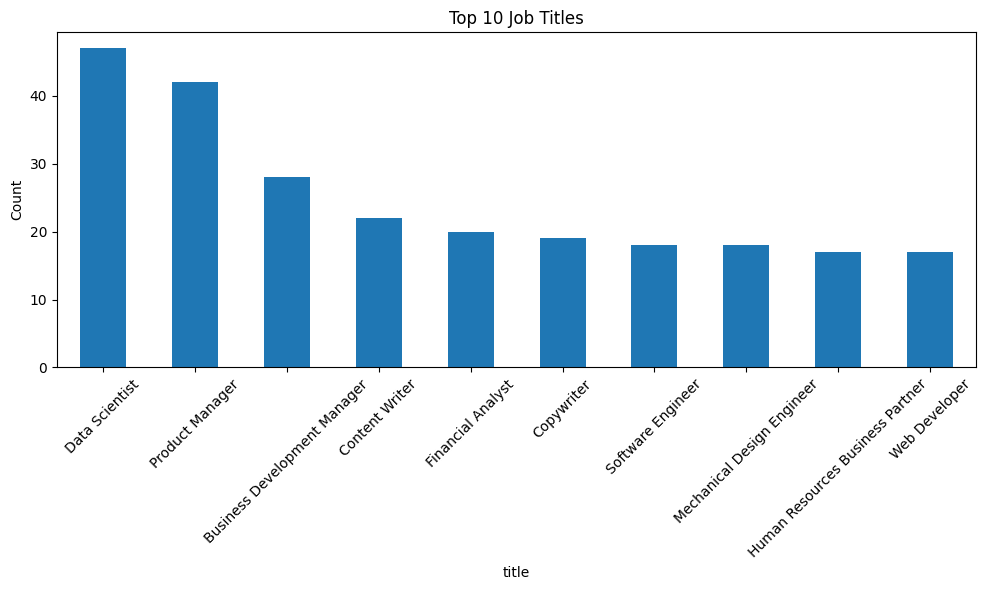

In [22]:
# Top 10 job titles
top_titles = df['title'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_titles.plot(kind='bar')
plt.title('Top 10 Job Titles')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




<ipython-input-9-5d69252ba467>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M').size()


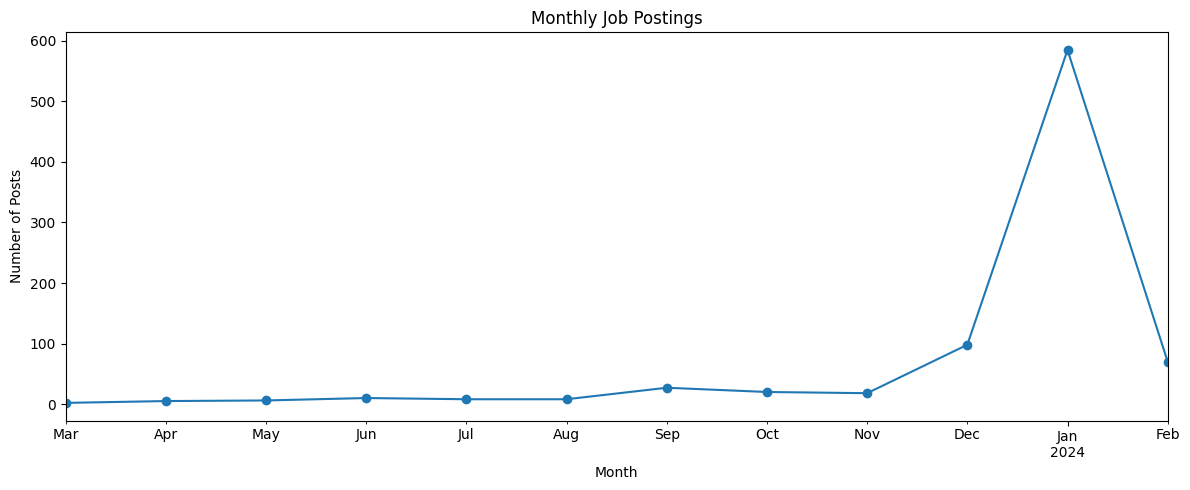

In [9]:
# Monthly postings
df.set_index('publishedAt', inplace=True)
monthly = df.resample('M').size()
plt.figure(figsize=(12,5))
monthly.plot(marker='o')
plt.title('Monthly Job Postings')
plt.ylabel('Number of Posts')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


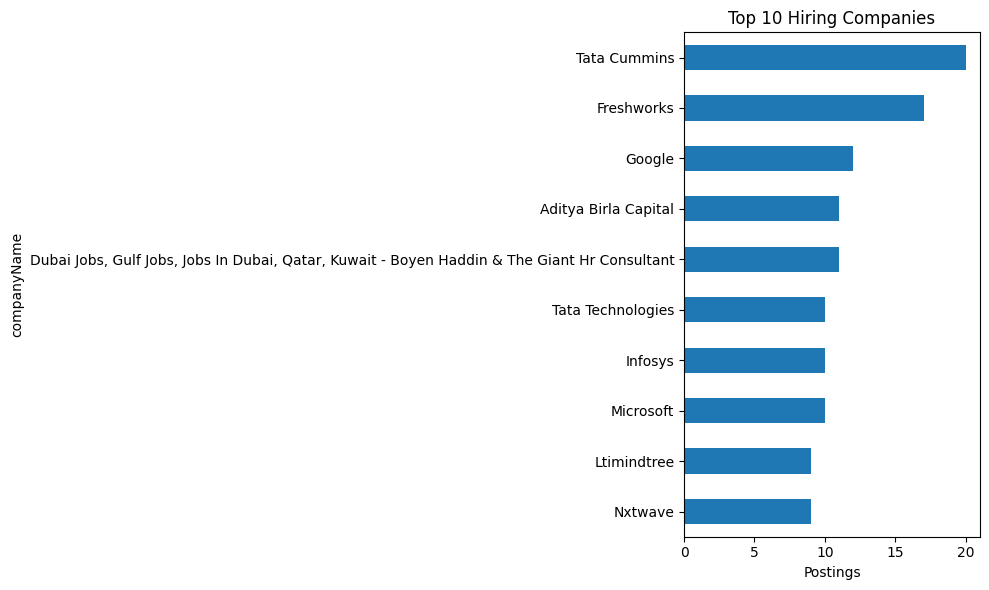

In [21]:
# Top hiring companies
top_co = df['companyName'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_co.plot(kind='barh')
plt.title('Top 10 Hiring Companies')
plt.xlabel('Postings')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




In [11]:
# Summary stats
print(df['applicationsCount'].describe())

# Top 10 by applications
df.nlargest(10, 'applicationsCount')[
    ['title','companyName','applicationsCount']
]


count    949.000000
mean     116.997893
std       73.459826
min       25.000000
25%       35.000000
50%      111.000000
75%      200.000000
max      200.000000
Name: applicationsCount, dtype: float64


,title,companyName,applicationsCount
publishedAt,,,
2024-01-17,Software Engineer,Microsoft,200.0
NaT,Software Engineer - Fullstack,Linkedin,200.0
2024-01-27,"Software Engineer, Systems Infrastructure",Linkedin,200.0
2024-01-25,Software Engineer - Front-End Developer,Nissan Motor Corporation,200.0
2024-01-04,Sde 1 (Frontend),Furrl,200.0
NaT,Software Engineer - Applications,Linkedin,200.0
2024-01-17,Software Development Engineer 1 (Sde-1),Publicis Sapient,200.0
2024-01-05,Software Engineer Ii,Uber,200.0
2024-01-09,Software Engineer- Java,Makemytrip,200.0


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('companyName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['applicationsCount']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'applicationsCount'}, axis=1)
              .sort_values('applicationsCount', ascending=True))
  xs = counted['applicationsCount']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('applicationsCount', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('companyName')):
  _plot_series(series, series_name, i)
  fig.legend(title='companyName', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('applicationsCount')
_ = plt.ylabel('count()')

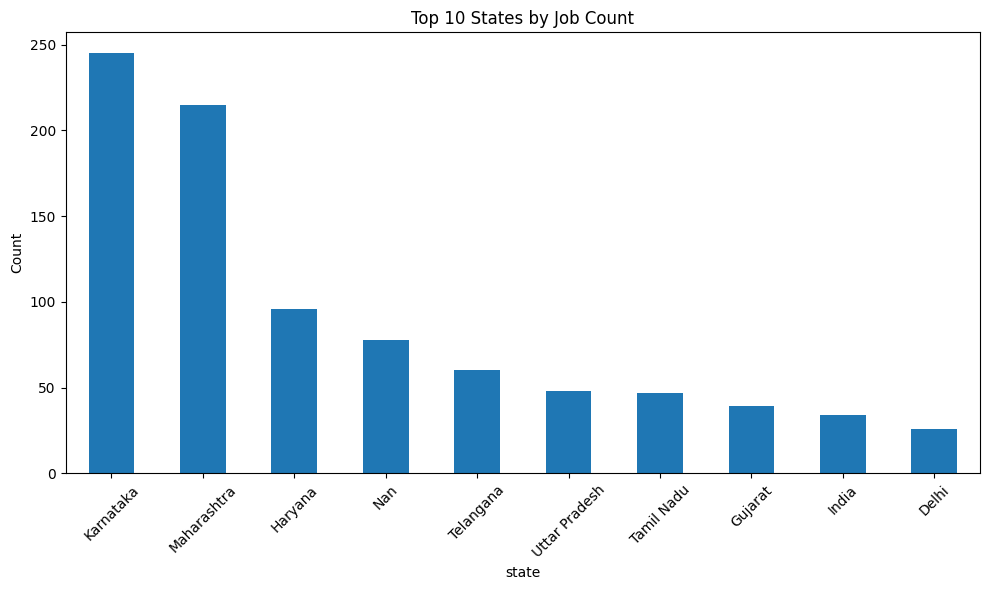

In [12]:
# Top states
top_states = df['state'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_states.plot(kind='bar')
plt.title('Top 10 States by Job Count')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 5. Feature Engineering

In [19]:
# --- Ensure datetime types ---
# The 'publishedAt' column is now the index, so we access it using df.index
df.index = pd.to_datetime(df.index, errors='coerce')  # Changed this line
df['postedTime']  = pd.to_datetime(df['postedTime'],  errors='coerce')

# --- New Features ---
# 1) Description length (chars) & word count
df['desc_length']     = df['description'].str.len()
df['desc_word_count'] = df['description'].str.split().apply(len)

# 2) Lag days between publish and post
# Access 'publishedAt' from the index
df['lag_days'] = (df['postedTime'] - df.index).dt.days  # Changed this line

# 3) Month‑Year bucket for trends
# Access 'publishedAt' from the index
df['year_month'] = df.index.to_period('M')  # Changed this line

# 4) Seniority level from title
def get_seniority(title):
    t = str(title).lower()
    if any(k in t for k in ['senior','lead','principal']):
        return 'Senior'
    if any(k in t for k in ['junior','associate','intern']):
        return 'Entry'
    return 'Mid'

df['seniority'] = df['title'].apply(get_seniority)

# 5) Boolean flag to integer
df['recently_posted_jobs'] = df['recently_posted_jobs'].map({'Yes': 1, 'No': 0}).astype(int)

# Preview the new features
df[['desc_length','desc_word_count','lag_days','year_month','seniority','recently_posted_jobs']].head()

,desc_length,desc_word_count,lag_days,year_month,seniority,recently_posted_jobs
publishedAt,,,,,,
2024-01-09,1857,267,NaN,2024-01,Mid,0
2024-01-09,2227,330,NaN,2024-01,Mid,0
2023-12-27,860,132,NaN,2023-12,Mid,0
2023-12-27,860,132,NaN,2023-12,Mid,0
2024-01-23,4347,618,NaN,2024-01,Mid,1


In [20]:
df.reset_index(drop=False, inplace=True)  # bring publishedAt back as column
from google.colab import files
df.to_csv('cleaned_linkedin_jobs_india.csv', index=False)
files.download('cleaned_linkedin_jobs_india.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 7. Export Cleaned Data

In [ ]:
df.to_csv('cleaned_linkedin_jobs_india.csv', index=False)